## **Import Lbraries** ##

In [1]:
# Importing req. libraries
import os
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage import exposure
import cv2

## **Convert Img to Numpy Array** ##

In [2]:
# Function to load image data and convert to numpy array
def convertImgToNumpyArr(image_path):
    try:
        img = Image.open(image_path)  # creating reference variable img to access image data
        img = img.resize((100, 100))  # resize image to 100x100 in case it is not
        img = np.array(img)  # converting image data from JPG to numpy array
        #img = img / 255.0  # normalizing RGB values (cv2 needs 0-255 range)
        return img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")  # error handling
        return None

## **Compute HOG Features** ##

In [3]:
# Function to compute HOG features of an image
def compute_hog_features(image):
    # conversion to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    grayscale_image = grayscale_image / 255.0  # normalizing

    fd, hog_image = hog(grayscale_image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True) 

    # increasing the contrast of the image
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return fd, hog_image_rescaled

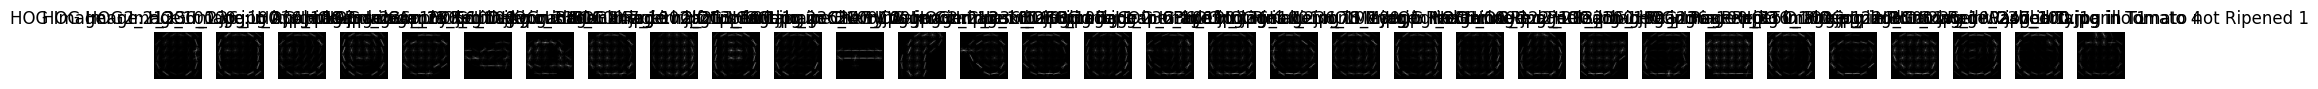

In [5]:
import os
import matplotlib.pyplot as plt
import math

# Path to the Training folder
training_folder = '../data/fruits-360/Training/'

# Get a list of all folders in the Training directory
folders = sorted([os.path.join(training_folder, folder) for folder in os.listdir(training_folder) if os.path.isdir(os.path.join(training_folder, folder))])

# Process every fifth folder
processed_folders = folders[::5]
num_images = 20

# Number of images to display per row
images_per_row = 5

# Calculate number of rows needed
num_rows = math.ceil(num_images / images_per_row)

# Set up the figure with the dynamic number of subplots
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten axes to easily access each subplot

# Process every fifth folder
for idx, folder in enumerate(processed_folders):
    # Get the first image file in the folder
    image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        image_path = image_files[0]  # Select the first image
        img_array = convertImgToNumpyArr(image_path)  # Convert image to numpy array
        if img_array is not None:
            fd, hog_image = compute_hog_features(img_array)  # Compute HOG features
            axes[idx].imshow(hog_image, cmap='gray')  # Display HOG image
            axes[idx].set_title(f"HOG Image: {os.path.basename(image_path)} in {os.path.basename(folder)}")
            axes[idx].axis('off')  # Turn off axis for cleaner view

# Hide any unused axes if there are fewer images than the total subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
